In [10]:
import pandas as pd
import seaborn as sns
import matplotlib as plt
import numpy as np

%matplotlib inline

In [7]:
df = pd.read_csv('conversion.csv')
df

ad_id  xyz_campaign_id  fb_campaign_id    age gender  interest  \
0      708746              916          103916  30-34      M        15   
1      708749              916          103917  30-34      M        16   
2      708771              916          103920  30-34      M        20   
3      708815              916          103928  30-34      M        28   
4      708818              916          103928  30-34      M        28   
...       ...              ...             ...    ...    ...       ...   
1138  1314410             1178          179977  45-49      F       109   
1139  1314411             1178          179978  45-49      F       110   
1140  1314412             1178          179979  45-49      F       111   
1141  1314414             1178          179981  45-49      F       113   
1142  1314415             1178          179982  45-49      F       114   

      Impressions  Clicks       Spent  Total_Conversion  Approved_Conversion  
0            7350       1    1.430000                 2                    1  
1           17861       2    1.820000                 2                    0  
2             693       0    0.000000                 1                    0  
3            4259       1    1.250000                 1                    0  
4            4133       1    1.290000                 1                    1  
...           ...     ...         ...               ...                  ...  
1138      1129773     252  358.189997                13                    2  
1139       637549     120  173.880003                 3                    0  
1140       151531      28   40.289999                 2                    0  
1141       790253     135  198.710001                 8                    2  
1142       513161     114  165.609999                 5                    2  

[1143 rows x 11 columns]

In [6]:
df.dtypes

ad_id                    int64
xyz_campaign_id          int64
fb_campaign_id           int64
age                     object
gender                  object
interest                 int64
Impressions              int64
Clicks                   int64
Spent                  float64
Total_Conversion         int64
Approved_Conversion      int64
dtype: object

# Проверим сколько уникальных рекламных кампаний было проведено

In [4]:
df.xyz_campaign_id.nunique()

3

# Построим график распределения числа показов (Impressions – сколько раз пользователи увидели данное объявление) для каждой рекламной кампании в Facebook

In [15]:
facebook_df = df.groupby('fb_campaign_id', as_index=False).agg({'Impressions':'sum'})
facebook_df.head()

fb_campaign_id  Impressions
0          103916         7350
1          103917        17861
2          103920          693
3          103928         8392
4          103929         1915

D:\WORK\Python\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Impressions', ylabel='Density'>

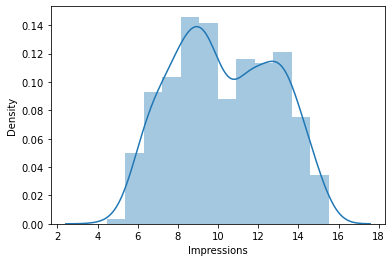

In [16]:
sns.distplot(np.log(facebook_df.Impressions))

# Посчитаем CTR

In [17]:
df['CTR'] = df['Clicks']/df['Impressions']

In [19]:
df['CTR'].describe()

count    1143.000000
mean        0.000164
std         0.000115
min         0.000000
25%         0.000100
50%         0.000160
75%         0.000234
max         0.001059
Name: CTR, dtype: float64

In [25]:
# id компании с наибольшим CTR
df.sort_values('CTR', ascending=False)

ad_id  xyz_campaign_id  fb_campaign_id    age gender  interest  \
150  738637              936          109857  45-49      F        24   
440  950224              936          123464  40-44      M        20   
505  951779              936          123723  45-49      F        27   
476  951202              936          123627  45-49      F        26   
448  950537              936          123516  40-44      M        36   
..      ...              ...             ...    ...    ...       ...   
270  777166              936          115625  30-34      M        63   
269  777131              936          115619  35-39      M        16   
268  777130              936          115619  35-39      M        16   
266  776935              936          115587  45-49      M        36   
181  747879              936          110947  30-34      F        30   

     Impressions  Clicks  Spent  Total_Conversion  Approved_Conversion  \
150          944       1   1.42                 1                    0   
440         2367       2   2.84                 1                    1   
505         3277       2   2.68                 1                    0   
476         5307       3   4.29                 2                    1   
448         1884       1   1.41                 1                    0   
..           ...     ...    ...               ...                  ...   
270         2383       0   0.00                 1                    1   
269         6359       0   0.00                 1                    0   
268         6260       0   0.00                 1                    0   
266         1136       0   0.00                 1                    1   
181          493       0   0.00                 1                    0   

          CTR  
150  0.001059  
440  0.000845  
505  0.000610  
476  0.000565  
448  0.000531  
..        ...  
270  0.000000  
269  0.000000  
268  0.000000  
266  0.000000  
181  0.000000  

[1143 rows x 12 columns]

# Визуализируем CTR

D:\WORK\Python\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='CTR', ylabel='Density'>

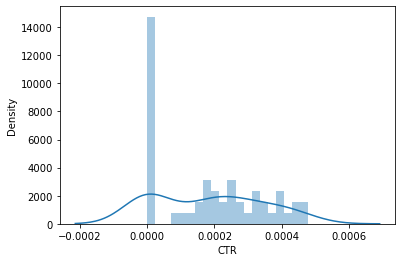

In [28]:
ctr_df = df.query('xyz_campaign_id == 916')['CTR']
#ctr_df
sns.distplot(ctr_df, bins=20)

# Посчитаем CPC

In [29]:
df['CPC'] = df['Spent'] / df['Clicks']

In [33]:
df['CPC'].quantile(0.75) - df['CPC'].quantile(0.25)

0.2543636990499998

# Визуализируем CPC

D:\WORK\Python\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\WORK\Python\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='CPC', ylabel='Density'>

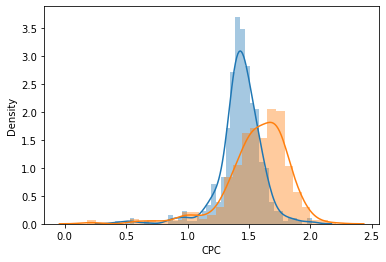

In [41]:
sns.distplot(df.query('gender == "F"')['CPC'].dropna())
sns.distplot(df.query('gender == "M"')['CPC'].dropna())

# Посчитаем конверсию (CR)

In [42]:
df['CR'] = df['Approved_Conversion'] / df['Clicks']

In [45]:
conversion = round(df.query('ad_id == 1121814')['CR'] * 100, 2)
conversion

860    3.09
Name: CR, dtype: float64